<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras                                                             # Open Source NN Library Download. 
import keras                                                                      # Loading/Importing the library. Access to useful functions to run CNN

In [0]:
import numpy as np                                                                # Importing the numpy library with alias np

from keras.models import Sequential                                               # Sequential Module Imported
from keras.layers import Flatten                                                  # Flatten Module Imported
from keras.layers import Convolution2D                                            # Convolution2D Module Imported
from keras.utils import np_utils                                                  # np_utils Module Imported

from keras.datasets import mnist                                                  # mnist dataset is loaded. Grayscale images of 10 digits  0-9 , image dimensions 28x28 

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()                          # mnist data divided into Training and Test Data
                                                                                  # Where X_train are 60K 28x28 gray scale training images of numbers from [0-9] 
                                                                                  # y_train are label of numbers from [0-9]

(60000, 28, 28)


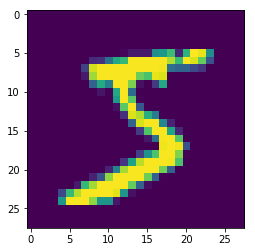

In [0]:
# Training data is divided into X_train and y_train
print (X_train.shape)                                                             # X_train's shape contains 60K 28x28 array 
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])                                                            # Displaying Image

In [0]:
X_train[0][6]

array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
       253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
         0,   0], dtype=uint8)

In [0]:
# (60000, 28, 28) ->  (60000, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train[0][6]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 30],
       [ 36],
       [ 94],
       [154],
       [170],
       [253],
       [253],
       [253],
       [253],
       [253],
       [225],
       [172],
       [253],
       [242],
       [195],
       [ 64],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [0]:
X_train = X_train.astype('float32')                                       # Convert to float type
X_test = X_test.astype('float32')
X_train /= 255                                                            # Floating Value ranges from [0,1]      
X_test /= 255

[[  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [ 30.]
 [ 36.]
 [ 94.]
 [154.]
 [170.]
 [253.]
 [253.]
 [253.]
 [253.]
 [253.]
 [225.]
 [172.]
 [253.]
 [242.]
 [195.]
 [ 64.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]]
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.11764706]
 [0.14117648]
 [0.36862746]
 [0.6039216 ]
 [0.6666667 ]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.99215686]
 [0.88235295]
 [0.6745098 ]
 [0.99215686]
 [0.9490196 ]
 [0.7647059 ]
 [0.2509804 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]  ## y_train to Y_train  - example,5 value is converted to an array where 5th element of array is 1(lit) and rest all is 0


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))    # Input Image size 28x28x1, 3x3 convolution with 32 channels,     GRF = 3, Parameters = 3x3x32x1  + 32        = 320           Output Image = 26x26x32
model.add(Convolution2D(64, 3, 3, activation='relu'))                           # Input Image size 26x26x32, 3x3 convolution with 64 channels,    GRF = 5, parameters = 3x3x32x64 + 64        = 18496         Output Image = 24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu'))                          # Input Image size 24x24x64, 3x3 convolution with 128 channels,   GRF = 7, parameters = 3x3x64x128 + 128      = 73856         Output Image = 22x22x128

model.add(MaxPooling2D(pool_size=(2, 2)))                                       # Input Image size 22x22x128, Max Pooling =2x2                    GRF = 14, parameters = 0                                    Output Image = 11x11x128

model.add(Convolution2D(256, 3, 3, activation='relu'))                          # Input Image size 11x11x128, 3x3 convolution with 256 channels,  GRF = 16, parameters = 3x3x256x128 + 256    = 295168        Output Image = 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu'))                          # Input Image size 9x9x256, 3x3 convolution with 512 channels,    GRF = 18, parameters = 3x3x512x256 + 512    = 1180160       Output Image = 7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu'))                         # Input Image size 7x7x512, 3x3 convolution with 1024 channels,   GRF = 20, parameters = 3x3x1024x512 + 1024  = 4719616       Output Image = 5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))                         # Input Image size 5x5x1024, 3x3 convolution with 2048 channels,  GRF = 22, parameters = 3x3x2048x1024 + 2046 = 18876416      Output Image = 3x3x2046
model.add(Convolution2D(10, 3, 3, activation='relu'))                           # Input Image size 3x3x2048, 3x3 convolution with 10 channels,    GRF = 24, parameters = 3x3x10x2046 + 10     = 184330        Output Image = 1x1x10
                                                                                # GRF should be 28 not 24
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)                                      # Code is learning, which image represents which class. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3024 - acc: 0.0994
Epoch 2/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)                                       # Apply model over test data 

In [0]:
print(score)                                                                            # How accurate is the model. Model is 10% accurate

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])                                                                        # Model predits any image is 10% of everything.

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


## Whats wrong with network.

1. Network take a lot of time learning the parameters and adjsuting the kernel.
2. Too many parameter to learn a small image. (25,348,362)
3. Model predicts any image to be 10% of every class.

## Why ?
1. An image is taken and convolved with 32 channels then  64 and so on with one max pooling layer. 
2. All the object the size of image are shrunk to a size where they make little to no sense. 
3. The last layer has 3x3 convolved with 1x1x10 to classify then to one of the then classes.
4. But the flatten image or pixel values end up becoming  very similar to each other hence the value are 10% per class.
5. The amount of parameters used is ridiculous hence the amount of time takes to adjust those parameters or kernels is insane. 

6. According to session most of the kernels would be empty or zero to avoid **Overfitting**


## According to me
1. According to session amount of kernel and layers depends on image size and dataset size. Hence the kernels to be used and layers to be used need to be adjusted. 
2. The receptive field should be decreased to 5*5 then convolved with 1 * 1 * 10 and then flatten to make more sense/accuracy.